# Graph Analysis Techniques without Feature Learning

# Dimensionality reduction with graphs

## Lab 4: Laplacian Eigenmaps 

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS6208_codes/codes/labs_lecture03/04_dim_reduc'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd

In [2]:
# Load libraries

# Math
import numpy as np

# Import data
import scipy.io

# Visualization 
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import compute_pca
from lib.utils import construct_knn_graph
from lib.utils import nldr_visualization
from lib.utils import construct_kernel

# Import
import scipy.sparse.linalg
import time
import scipy.ndimage

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
mat = scipy.io.loadmat('datasets/MNIST.mat')
W = mat['W']
n = W.shape[0]
Cgt = mat['C'].squeeze()
print(n)

# Run NLDR = Laplacian Eigenmaps
Xnldr_lapeigmap,Ynldr_lapeigmap,Znldr_lapeigmap = nldr_visualization(W)

70000


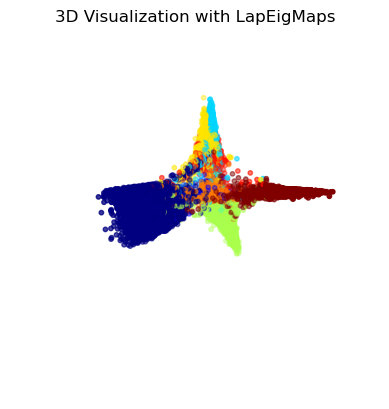

In [4]:
# 3D Plot
fig = pylab.figure(1)
ax = fig.add_subplot(projection='3d')
size_vertex_plot = 10
ax.scatter(Xnldr_lapeigmap, Ynldr_lapeigmap, Znldr_lapeigmap, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
ax.view_init(24,-105)
ax.axis('off')
plt.title('3D Visualization with LapEigMaps') 
pyplot.show()

In [5]:
# Run LDR = Standard PCA
mat = scipy.io.loadmat('datasets/MNIST_data.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['C'].squeeze()
print(n,d)

nb_pca = 3
[PC,PD,EnPD] = compute_pca(X,nb_pca)
Xldr = PC[:,0]
Yldr = PC[:,1]
Zldr = PC[:,2]

60000 784


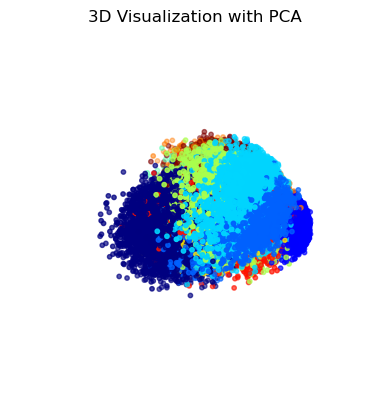

In [6]:
# 3D Plot
fig = pylab.figure(2)
ax = fig.add_subplot(projection='3d')
size_vertex_plot = 10
ax.scatter(Xldr, Yldr, Zldr, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
ax.view_init(24,-105)
ax.axis('off')
plt.title('3D Visualization with PCA') 
pyplot.show()

9298


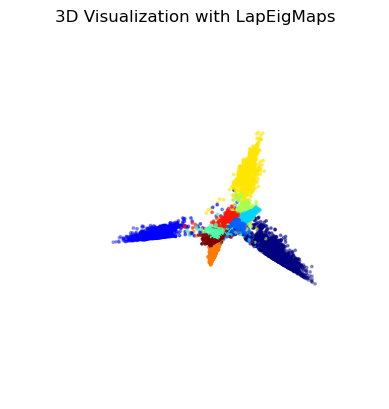

In [7]:
mat = scipy.io.loadmat('datasets/USPS.mat')
W = mat['W']
n = W.shape[0]
Cgt = mat['C'].squeeze()
print(n)

# Run NLDR = Laplacian Eigenmaps
Xnldr_lapeigmap,Ynldr_lapeigmap,Znldr_lapeigmap = nldr_visualization(W)

# 3D Plot
fig = pylab.figure(3)
ax = fig.add_subplot(projection='3d')
size_vertex_plot = 3
ax.scatter(Xnldr_lapeigmap, Ynldr_lapeigmap, Znldr_lapeigmap, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
ax.view_init(-0,100)
ax.axis('off')
plt.title('3D Visualization with LapEigMaps') 
pyplot.show()
